# Assignment 2: Spam Classification with SVM

### CS 6316 Machine Learning - Department of Computer Science - University of Virginia
*Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the assignment, you will use SVMs to build your own spam filter. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


---
## 1. PRE-PROCESSING THE DATA (15 pts)

**Data Acquiring:** Download the dataset from https://archive.ics.uci.edu/ml/datasets/Spambase

**Data Splitting:** Put data into the format needed for SVM, then split it into 80% training, 20% testing (each should have approximately the same proportion of position and negative examples).

**Data Discovery:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. 

**Feature Scaling** You can use the standard Scikit-Learn library can write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

In [1]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

X_data = pd.read_csv('./spambase.data', header=None, usecols=list(range(57)))
y_data = pd.read_csv('./spambase.data', header=None, usecols=[57])
print(X_data.info())
print(y_data.info())
print(X_data.corr())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 57 columns):
0     4601 non-null float64
1     4601 non-null float64
2     4601 non-null float64
3     4601 non-null float64
4     4601 non-null float64
5     4601 non-null float64
6     4601 non-null float64
7     4601 non-null float64
8     4601 non-null float64
9     4601 non-null float64
10    4601 non-null float64
11    4601 non-null float64
12    4601 non-null float64
13    4601 non-null float64
14    4601 non-null float64
15    4601 non-null float64
16    4601 non-null float64
17    4601 non-null float64
18    4601 non-null float64
19    4601 non-null float64
20    4601 non-null float64
21    4601 non-null float64
22    4601 non-null float64
23    4601 non-null float64
24    4601 non-null float64
25    4601 non-null float64
26    4601 non-null float64
27    4601 non-null float64
28    4601 non-null float64
29    4601 non-null float64
30    4601 non-null float64
31    4601 non-null float

In [2]:
scatter_matrix(X_data[list(range(4))], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001217D32AD30>,
      dtype=object)

In [3]:
imputer = Imputer(strategy = 'median') #data cleaning
X_data = imputer.fit_transform(X_data)
y_data = y_data.values.ravel() #convert to numpy 1d array

In [4]:
X_data = scale(X_data) #scaling

print("full data shape:")
print(X_data.shape)
print(y_data.shape)

full data shape:
(4601, 57)
(4601,)


In [5]:
X_train,X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2,random_state=42)


print("train shape: ",X_train.shape)
print("test shape: ",X_test.shape)

train shape:  (3680, 57)
test shape:  (921, 57)


- - -
## 2. TRAINING SVM FOR SPAM CLASSIFICATION (15 pts)

Run your linear SVM classifier on the training data, and test the resulting model on the test data. In this section, you may use the default **loss function** (hinge) and **default** value of the C hyperparameter (=1.0):

* Report accuracy, precision, recall?
* Create an ROC curve for this SVM on the test data, using 200 or more evenly spaced thresholds. You may use library function calls to create the ROC curve?

**Implementation Notes:** You do NOT need to add a column of 1's to the $\mathbf{
x}$ matrix to have an intercept term

In [6]:
from sklearn.svm import LinearSVC

# Training your svm here
svm_clf = LinearSVC(C=10, loss="hinge", random_state=42)

# Testing your svm here
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# Training your svm here
svm_clf = LinearSVC(C=20, loss="hinge", random_state=42)
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)

# Testing your svm here
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Confusion matrix: \n',confusion_matrix(y_test, y_pred))
print('Accuracy: ', acc)
print('Precision: ',prec)
print('Recall: ',recall)


Confusion matrix: 
 [[504  27]
 [ 40 350]]
Accuracy:  0.9272529858849077
Precision:  0.9283819628647215
Recall:  0.8974358974358975


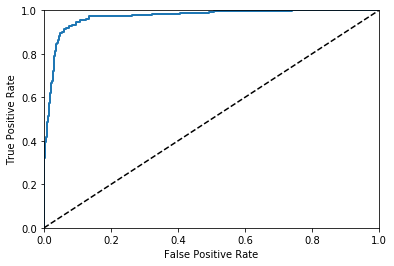

In [7]:
y_test_scores = svm_clf.decision_function(X_test)
#print(y_test_scores)
fpr, tpr, threshold = roc_curve(y_test, y_test_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()


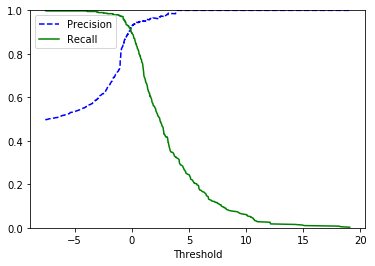

In [8]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_test_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

- - -
## 3. TUNING C FOR LINEAR SVM (15 pts)
In this part of the assignment, you will try using different values of the C parameter with SVMs. Your task is to try different values of C on this dataset. For example, when C is small, you should find that the SVM puts the decision boundary in the gap between the two datasets and misclassifies the data point. When C is large, you should find that the SVM now classifies every single example correctly, but has a decision boundary that does not appear to be a natural fit for the data. 

In a 2-D feature space of your choice, you must be able to plot out the decision boundary of SVM for different values of C to earn credit for this section. Depends on your observation on the dataset, you must provide some justifications on the reason you select a certain value of C to tradeoff margin and data violation. 

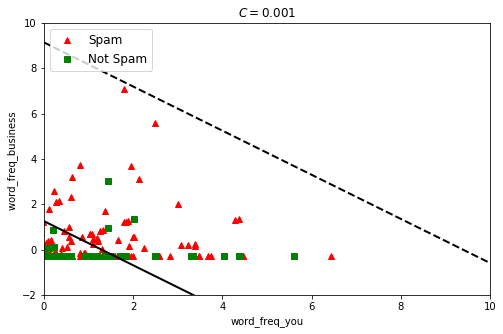

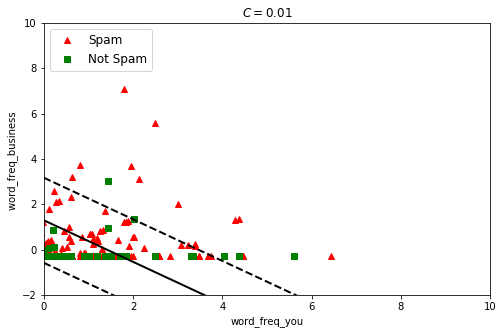

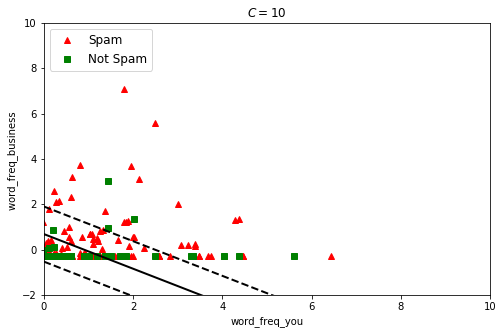

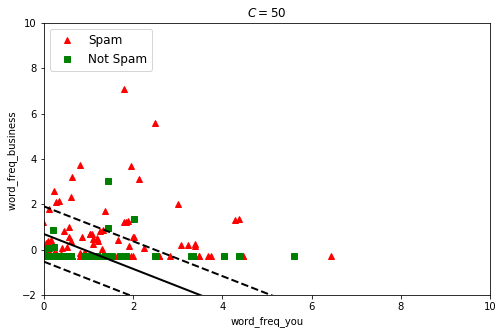

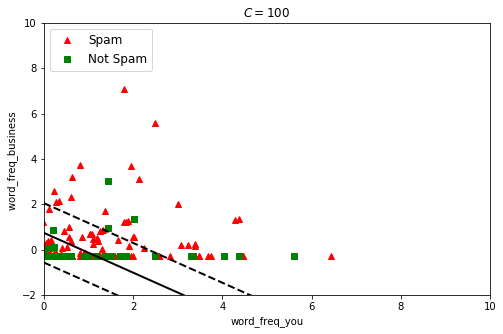

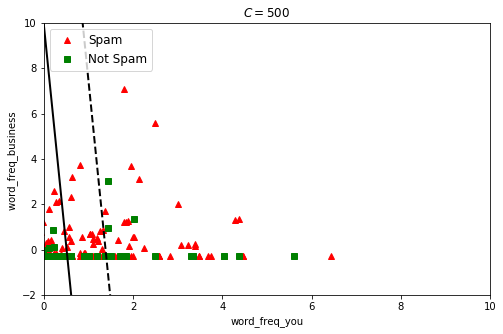

In [29]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)



X = X_train[:700, [5,7]] #for feature 5 and 7
y = y_train[:700]

C = [0.001, 0.01, 10, 50, 100, 500]

for i in range(len(C)):
    scaler = StandardScaler()
    svm_clf1 = LinearSVC(C=C[i], loss="hinge", random_state=42)
    scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
    scaled_svm_clf1.fit(X, y)
    
    # Convert to unscaled parameters
    b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
    w1 = svm_clf1.coef_[0] / scaler.scale_
    svm_clf1.intercept_ = np.array([b1])
    svm_clf1.coef_ = np.array([w1])
    
    # Find support vectors (LinearSVC does not do this automatically)
    t = y * 2 - 1
    support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
    svm_clf1.support_vectors_ = X[support_vectors_idx1]

    plt.figure(figsize=(8,5))
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^", label="Spam")
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "gs", label="Not Spam")
    plot_svc_decision_boundary(svm_clf1, 0, 10)
    plt.xlabel("word_freq_you", fontsize=10)
    plt.ylabel("word_freq_business ", fontsize=10)
    plt.legend(loc="upper left", fontsize=12)
    plt.title("$C = {}$".format(svm_clf1.C), fontsize=12)
    plt.axis([0, 10, -2, 10])
    
    #Justification for selecting C : From the plot (using only 2 features) and accuracy value, we can see that  our linear SVM model works best for C = 10~100. 
#Therefore, we select the final value of C as 20 for our model.

Sorted feature (ascending order):  [17  1 21 12 50 36 54 11 13 48 18  2 49 42  9 10 27 37  8 20 46 32  0 39
  7  5 16 23 29 38 56 30 33 51 53 35 44  4 31 34 28 22  3 25 47  6 14 19
 15 52 55 45 41 43 24 40 26]


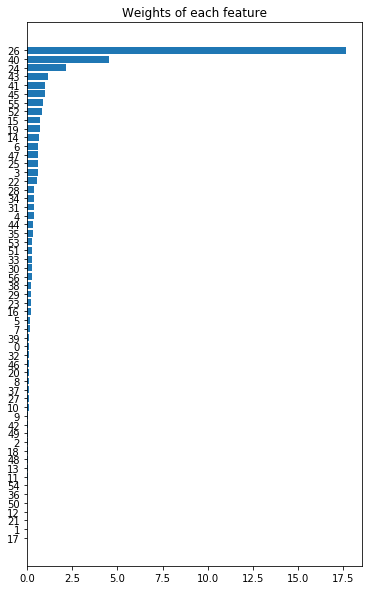

In [30]:
w = np.absolute(svm_clf.coef_.flatten()) #w vector for 57 features
sorted_index = np.argsort(w, axis=None)
print('Sorted feature (ascending order): ',sorted_index)
#print(w[sorted_index])
def draw_feature_weights(w, names):
    imp = w
    imp,names = zip(*sorted(zip(imp,names)))
    plt.figure(figsize=(6,10))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title('Weights of each feature') 
    plt.show()

names = list(range(57))
names = [str(f) for f in names]
draw_feature_weights(w.ravel(), names)

- - -
## 4. SELECTING THE FEATURES WITH SVM (25 pts)

Once your learned a best linear SVM in previous sections, your task in this section is to select the best features. First, you must * Obtain the weight vector $\mathbf{w}$. Then, for the number of features $n = 2$ to 57, you will run the following (in a loop of course):

* Select the set of $n$ features that have the highest $\mathbf{w}_n$
* Train an SVM, $SVM_n$, on all training data, only using these $n$ features with the same hyperparameter C.
* Test $SVM_n$ on the test set (using the same $n$ features) to obtain accuracy.
* Plot accuracy on test data vs. $n$ number of features

In one paragraph, discuss the effects of feature selection including the top 5 features.

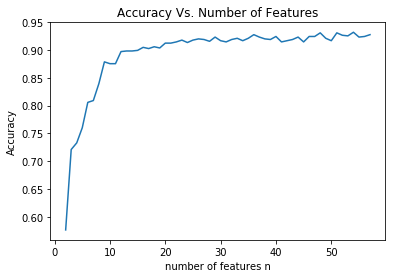

In [31]:
# Your feature selection code goes here

svm_clf = LinearSVC(C=20, loss="hinge", random_state=42)
accuracies = []
all_n = []
for i in range(2,58):
    f_index = sorted_index[-i:]
    dx_train = X_train[:,f_index]
    dx_test = X_test[:,f_index]
    
    svm_clf.fit(dx_train, y_train)
    y_pred = svm_clf.predict(dx_test)
    accuracies.append(accuracy_score(y_test, y_pred))
    all_n.append(len(f_index))

plt.plot(all_n, accuracies)
plt.xlabel('number of features n')  
plt.ylabel('Accuracy')  
plt.title('Accuracy Vs. Number of Features') 
plt.show()

## Your paragraph goes here for this section

#From the following graph, it is clear that the accuracy increases in a very high rate upto top 20 features. 
#From the above graph, we can see that 20-25 features have significant weights that impacts the accuracy of our model.
#Initially, when number of features is very small (e.g., n= 5), accuracy isn't good enough because small number of features outperform the weights of them.
#As we add more less important features (after 20-25 most important features), the accuracy doesn't improve much. 

- - -
## 5. KERNELIZING SVM WITH THE GAUSSIAN RBF (30 pts)

In this part of the asisgnment, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable. 

$
    \mathbf{K}_{RBF}(\mathbf{x}^{(i)},\mathbf{x}^{(j)}) = \exp(-\gamma ||\mathbf{x}^{(i)} -\mathbf{x}^{(j)}||^2).
$

Your task is to determine the best $C$ and $\gamma$ hyperparameters to use, run SVM on the spam data and report the performance in metrics similar to section 2. By using the Gaussian kernel with the SVM, you will be able to learn a non-linear decision boundary that can perform reasonably well for this dataset. 

Finally, run the version of SVM with the best hyperparameters on the test set, and plot out the comparison in terms of accuracy, precision, and recall, and the ROC curve) to those of linear SVM in Section 3. How much your SVM classifier perform better? 

**Implementation Note:** When implementing cross validation to select the best C and $\gamma$ parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly.




In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2), ...
# for gamma, C in hyperparams:
#    rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma, C=C))
#    rbf_kernel_svm_clf.fit(X_cv, y_cv)
#    # Your code to train and find the best value of C and gamma here

C_range = [0.1, 20, 50, 100, 500]
gamma_range = [0.0001, 0.001, 0.01, 10, 100]
param_grid = {'gamma':gamma_range, 'C':C_range}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)
print('accuracy: ',accuracy_score(y_test, y_pred))

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

accuracy:  0.9435396308360477
The best parameters are {'C': 100, 'gamma': 0.001} with a score of 0.93


In [45]:
C_best = 100   #found by Grid Search
gamma_best = 0.001    #found by Grid Search

rbf_kernel_svm_clf = SVC(kernel="rbf", gamma=gamma_best, C=C_best)
rbf_kernel_svm_clf.fit(X_train, y_train)

y_pred1 = rbf_kernel_svm_clf.predict(X_test)

# Testing your svm here
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
print('RBF Confusion matrix: \n',confusion_matrix(y_test, y_pred1))
print('RBF Accuracy: ',acc1)
print('RBF Precision: ',prec)
print('RBF Recall: ',recall)


RBF Confusion matrix: 
 [[516  15]
 [ 37 353]]
RBF Accuracy:  0.9435396308360477
RBF Precision:  0.9283819628647215
RBF Recall:  0.8974358974358975


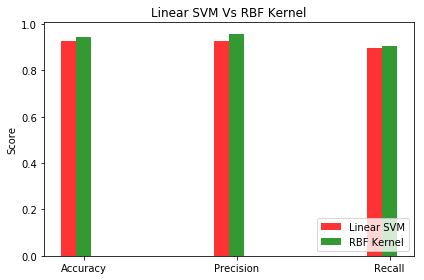

In [46]:
n_groups = 3
linear = (acc, prec, recall)
rbf_kernel= (acc1, prec1, recall1)
 
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.10
opacity = 0.8
 
rects1 = plt.bar(index, linear, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Linear SVM')
 
rects2 = plt.bar(index + bar_width, rbf_kernel, bar_width,
                 alpha=opacity,
                 color='g',
                 label='RBF Kernel')
 
#plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Linear SVM Vs RBF Kernel')
plt.xticks(index + bar_width, ('Accuracy', 'Precision', 'Recall'))
plt.legend(loc='lower right')
 
plt.tight_layout()
plt.show()

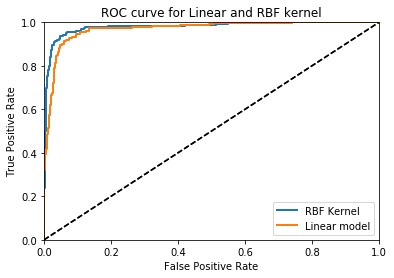

In [48]:
y_test_scores_rbf = rbf_kernel_svm_clf.decision_function(X_test)
#print(y_test_scores)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_test_scores_rbf)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for Linear and RBF kernel')
    plt.legend(loc='best')

plot_roc_curve(fpr1, tpr1,'RBF Kernel')#rbf non-linear model
plot_roc_curve(fpr,tpr, 'Linear model')#linear model
plt.show()

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](https://docs.google.com/document/d/15qB84xjaS-uRJmfKmmQuCz38bLMFaoqdbuRLoZEdOYI/edit#heading=h.72k1pvft525n)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS6316 Assignment 2:...".

Best of luck and have fun!